# 스팸 메일 분류

In [3]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
# 총 데이터 수 확인
print(len(data))
# 데이터 5행 출력
data.head()


5572


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
data['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [5]:
# 필요없는 컬럼 삭제 및 레이블 매핑
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#del data['Unnamed: 2']
#del data['Unnamed: 3']
#del data['Unnamed: 4']

In [6]:
# 결측치 확인
print(data.isnull().sum())

v1    0
v2    0
dtype: int64


In [ ]:
#print(data.isnull().values.any())

In [7]:
# 중복된 데이터가 있는지 확인(고유한 데이터와 전체 데이터 개수 비교)
len(data['v2'].unique())

5169

In [8]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)

# 총 데이터 수 출력
print('제거 후 남은 샘플 수: ', len(data))

제거 후 남은 샘플 수:  5169


In [9]:
# 데이터 분포 확인
data['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [10]:
# 정상 메일과 스팸 메일의 비율 비교
print(f'정상 메일의 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


레이블이 굉장히 불균형하기 때문에 훈련 데이터와 테스트 데이터의 레이블 비율을 유지해서 분리

In [11]:
# X_data, y_data 분리
X_data = data['v2']
y_data = data['v1']

In [15]:
# X_data와 y_data를 8:2 비율로 분할(stratify=y_data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)


In [52]:
y_train.value_counts()

v1
0    3613
1     522
Name: count, dtype: int64

In [16]:
print('훈련 데이터의 비율')
print(f'정상 메일의 비율 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

훈련 데이터의 비율
정상 메일의 비율 = 87.376%
스팸 메일의 비율 = 12.624%


In [17]:
print('테스트 데이터의 비율:')
print(f'정상 메일의 비율 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')


테스트 데이터의 비율:
정상 메일의 비율 = 87.331%
스팸 메일의 비율 = 12.669%


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizer 객체 생성
tokenizer = Tokenizer()

# X_train에 존재하는 단어마다 부여될 숫자 계산
tokenizer.fit_on_texts(X_train)

# 단어 벡터화
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In [19]:
# X_train_encoded 출력
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [20]:
# mapping 된 단어 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [21]:
# 단어 집합의 크기를, 전체 단어수+1로 지정
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7822


메일의 최대 길이 : 189
메일의 평균 길이 : 15.754534


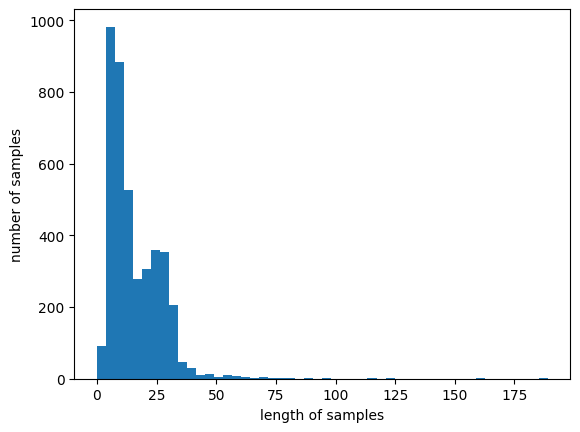

In [23]:
import matplotlib.pyplot as plt

print('메일의 최대 길이 : %d' % max(len(l) for l in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in X_train_encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 메일의 최대 길이가 그리 크지 않기 때문에, 최대길이 사용하여 padding
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_len)
X_train_padded

array([[   0,    0,    0, ...,    3,   17,   39],
       [   0,    0,    0, ...,  137,    2, 2326],
       [   0,    0,    0, ...,  186,  122, 1512],
       ...,
       [   0,    0,    0, ...,    2,   18, 1604],
       [   0,    0,    0, ..., 1297,  560,  122],
       [   0,    0,    0, ...,   12, 7820, 7821]])

# 스팸 메일 분류

In [28]:
# 모델 생성 및 컴파일
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, Conv1D

model = Sequential()
model.add(Embedding(vocab_size, 32))
#model.add(SimpleRNN(32))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# 모델 학습(history 저장)
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8598 - loss: 0.4513 - val_accuracy: 0.8779 - val_loss: 0.2705
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9139 - loss: 0.2255 - val_accuracy: 0.9722 - val_loss: 0.1113
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.0704 - val_accuracy: 0.9782 - val_loss: 0.0643
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9867 - val_loss: 0.0535
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9855 - val_loss: 0.0519


In [31]:
# 테스트 정확도 출력
print('테스트 정확도:',model.evaluate(X_test_padded, y_test)[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0509
테스트 정확도: 0.9816247820854187


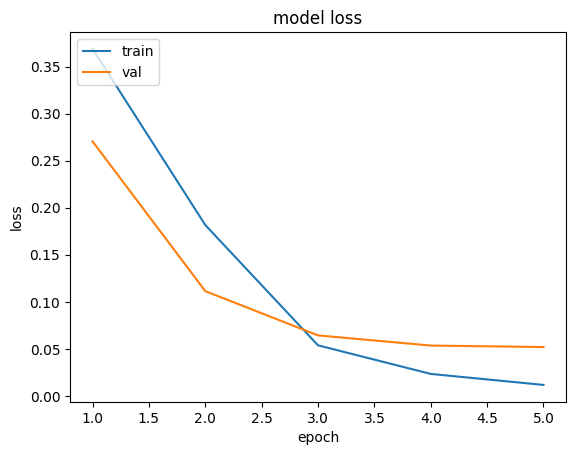

In [33]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()